In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargue de datos

In [2]:
df_dane = gpd.read_file(
    "../../data/raw/dane/data_dane/MPM_FuenteCensal_2018.shp"
)
df_dane.columns

Index(['DPTO_CCDGO', 'MPIO_CCDGO', 'MPIO_CNMBR', 'MPIO_CCNCT', 'DPTO_CNMBR',
       'MPM', 'MPM_CAB', 'MPM_CPRD', 'AFBMO_TOT', 'AFBMO_CAB', 'AFBMO_CPRD',
       'BLE_TOT', 'BLE_CAB', 'BLE_CPRD', 'BSCPI_TOT', 'BSCPI_CAB',
       'BSCPI_CPRD', 'BASS_TOT', 'BASS_CAB', 'BASS_CPRD', 'TDE_TOT', 'TDE_CAB',
       'TDE_CPRD', 'HC_TOT', 'HC_CAB', 'HC_CPRD', 'IEE_TOT', 'IEE_CAB',
       'IEE_CPRD', 'IE_TOT', 'IE_CAB', 'IE_CPRD', 'MIPE_TOT', 'MIPE_CAB',
       'MIPE_CPRD', 'MIP_TOT', 'MIP_CAB', 'MIP_CPRD', 'RE_TOT', 'RE_CAB',
       'RE_CPRD', 'SAFAM_TOT', 'SAFAM_CAB', 'SAFAM_CPRD', 'SAS_TOT', 'SAS_CAB',
       'SAS_CPRD', 'TRINF_TOT', 'TRINF_CAB', 'TRINF_CPRD', 'TRIML_TOT',
       'TRIML_CAB', 'TRIML_CPRD', 'geometry'],
      dtype='str')

In [ ]:
# Selección de columnas de interés
# Solo se toman las columnas relacionadas con variables sociales

# Columnas de identificación
cols_id = [
    "DPTO_CNMBR",
    "MPIO_CNMBR",
    "geometry"
]
# Columnas sociales
cols_social = [
    # educación
    "AFBMO_TOT",   # analfabetismo
    "BLE_TOT",     # bajo logro educativo

    # salud / servicios
    "BASS_TOT",    # barreras acceso salud
    "SAS_TOT",     # sin aseguramiento salud

    # vivienda
    "HC_TOT",      # hacinamiento
    "MIPE_TOT",    # paredes inadecuadas
    "MIP_TOT",     # pisos inadecuados
    "SAFAM_TOT",   # sin agua mejorada

    # trabajo
    "TRIML_TOT"    # informalidad
]

df = df_dane[cols_id + cols_social].copy()

## Exploración de datos

In [4]:
df.describe()

,AFBMO_TOT,BLE_TOT,BASS_TOT,SAS_TOT,HC_TOT,MIPE_TOT,MIP_TOT,SAFAM_TOT,TRIML_TOT
count,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,17.426827,66.962121,5.091622,14.750357,11.162210,5.186898,15.701248,27.113636,87.584492
std,8.023905,12.675314,4.068631,6.401784,7.492126,8.235145,16.828534,21.929155,6.829447
min,2.000000,18.300000,0.000000,5.300000,1.400000,0.000000,0.000000,0.200000,58.700000
25%,11.925000,61.000000,2.300000,11.200000,5.600000,0.600000,3.000000,9.800000,84.200000
50%,16.200000,69.900000,4.200000,13.700000,8.700000,2.100000,9.650000,21.400000,89.250000
75%,21.400000,76.000000,6.600000,16.600000,15.400000,6.200000,22.700000,38.700000,92.600000
max,52.500000,96.200000,40.200000,68.700000,58.100000,72.700000,86.700000,99.000000,100.000000


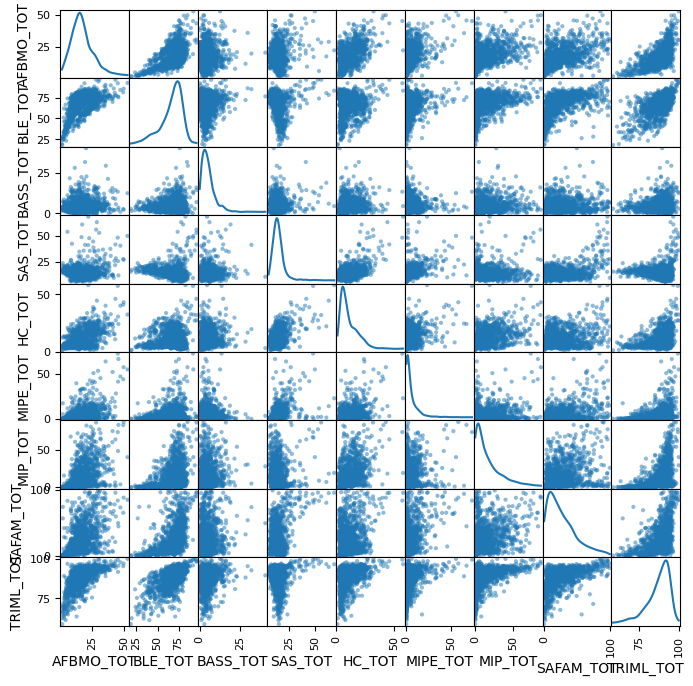

In [5]:
# Matriz de dispersión para las variables sociales

pd.plotting.scatter_matrix(
    df[cols_social],
    figsize=(8, 8),
    diagonal="kde"
)
plt.show()


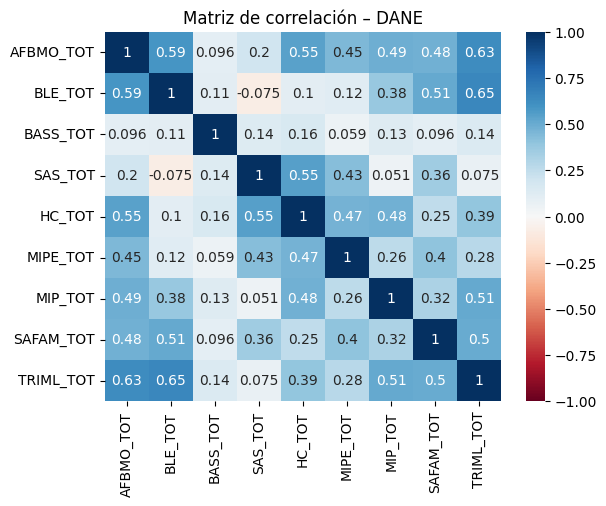

In [6]:
# Matriz de correlación para las variables sociales

sns.heatmap(
    df[cols_social].corr(),
    annot=True,
    cmap="RdBu",
    vmin=-1,
    vmax=1
)
plt.title("Matriz de correlación – DANE")
plt.show()


Los datos no presentan datos nulos.

Las variables escogidas no tienen correlaciones fuertes y distribuciones que pueden estar relacionadas.

In [8]:
df.to_csv("../../data/transformed/dane/dane.csv", index=False)